In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt 
import statistics as st
import math as m

from mpl_toolkits.mplot3d import Axes3D


Montecarlo: metodo de calculo que usa el azar y la probabilidad para devolver numeros.
Podemos usarlo para resolver algo con muchos valores al azar y ver la distribucion de resultados.
Una de las cosas mas importantes en física son las mediciones. Estos valores por lo general devuelven una gausseana, se calcula el valor medio. 
(revisar conceptos de estadistica.)

Punto 1


In [17]:
num = rnd.random(100) * 6 + 1  #(multiplico por la diferencia entre los extremos y sumo el inicial)
num2= []

for nro in num:
    num2.append(int(nro))
print(num2)

[3, 3, 6, 5, 6, 5, 4, 3, 2, 6, 3, 5, 1, 3, 1, 3, 1, 5, 4, 1, 3, 3, 6, 3, 4, 6, 5, 5, 6, 4, 2, 6, 2, 6, 1, 2, 2, 2, 1, 3, 5, 6, 1, 3, 2, 3, 5, 4, 5, 2, 4, 6, 3, 3, 2, 6, 1, 6, 1, 2, 6, 2, 4, 2, 1, 5, 3, 2, 2, 5, 4, 1, 3, 3, 5, 4, 5, 3, 6, 5, 1, 1, 6, 5, 5, 3, 5, 5, 6, 1, 6, 2, 5, 4, 2, 6, 3, 1, 6, 4]


punto 2 : creo programa que tire el dadito n veces y registre en un vector


In [18]:
def tirar_dado(n=20):
    
    num = rnd.random(n) * 6 +1
    num2= []
    six = 0

    for i in num:
        num2.append(int(i))
    
    for j in num2:
        if j == 6:
            six = six + 1
    
    avg = round(six / len(num),3)
    return six, avg


In [19]:
six, avg  = tirar_dado(90)
print ("cantidad de veces que salio el 6 : " + str(six) +  " promedio de veces que sale:  " + str (avg * 100) + "%")

cantidad de veces que salio el 6 : 18 promedio de veces que sale:  20.0%


punto 3:  ejemplo de charly, calcular el valor de PI

In [20]:
suma = 0
N = 10000

for i in range(N):
    x = rnd.random()
    y = rnd.random()

    if y < m.sqrt(1 - x**2):
        suma = suma + 1

integral = suma/N
pi = integral * 4
print(pi)

3.1424


punto 4 : integral de x**2 entre 0 y 4

In [2]:
suma = 0
N = 1000000
max = 4

def f(x):
    return x**2

for i in range(N):
    
    x = rnd.random() * max
    y = rnd.random() * f(max)

    if y < x**2:
        suma = suma + 1

integral = suma/N
area = max * f(max)
solution = integral * area 
print(solution)

21.314112


punto 5: integral de la distribucion campana de gauss

1.75


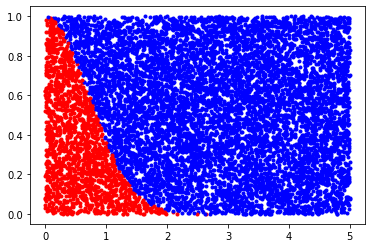

In [22]:
suma = 0
N = 10000
 
for i in range (N):
    x = rnd.random() * 5
    y = rnd.random() 

    if y < m.e**(-x**2):
        suma = suma + 1
        plt.plot(x,y,'.r')
    else:
        plt.plot(x,y,'.b')
    plt.show

integral = suma / N
area = 5
solucion = 2*integral*area
print(solucion)

punto 6: volumen de 1/8 de esfera

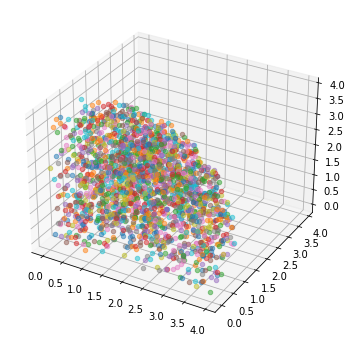

Vol montecarlo: 33.088 m^3. Vol definicion: 33.510321638291124m^3


In [23]:
suma = 0
N = 4000
R = 4
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot( projection='3d')

for i in range (N):
    #como los nros son positivos, va a estar en el primer octante
    x = rnd.random() * R
    y = rnd.random() * R
    z = rnd.random() * R
    d = x**2 + y**2

    if R**2 >= d :
        if z <=  m.sqrt(R**2 - d):
                suma = suma + 1
                ax.scatter(x,y,z, alpha=0.5) 

plt.show()
integral = suma / N
vol_recinto = R * R * R
vol_mc = integral * vol_recinto
vol_def = ((4/3) * m.pi * R**3 )/ 8 
print('Vol montecarlo: '+ str(vol_mc) + ' m^3. Vol definicion: ' + str(vol_def) + 'm^3' )

Calculo de errores 

Una de las cosas mas importantes en física son las mediciones. Estos valores por lo general devuelven una gausseana, se calcula el valor medio. 
(revisar conceptos de estadistica.)
Simulamos millones de veces y en teoria los resultados van a formar una gausseana.

error estadistico: medir cuanto esta alejado el valor i del valor mas probable.

X = sum(x_i/N)  (valor mas probable)

e = (x_i - X)^2

varianza = sum(e)/N

desv estandadar ^ 2 = varianza (cuanto te desvias del valor medio)

--> regla 68 95 99: con una desviacion, dentro tenes el 68% de la poblacion de la muestra, con dos sigmas tenes el 95% y con tres el 99%
X +- sigma = 68% de las mediciones entan dentro de la gausseana
X +- 2sigma = 95% de las mediciones estan dentro de la gausseana
X +- 3sigma = 99% de las medicione estan dentro de la gausseana 

In [24]:
import numpy.random as nprnd 

In [25]:
g = 9.8 
d = 10
mu = 0.5

#determino t0
t0 = m.sqrt(2*d/mu*g)
#y v0
v0 = m.sqrt(2*d*mu*g)

# para generar el random (multiplico por el doble del error (sigma) y sumo el  valor inicial -1)
delta_mu = 0.2 #por que es  +- 0.1
delta_d = 2 #por que es +-1
MCmu = nprnd.rand(10000) * delta_mu + 0.40
MCd =  nprnd.rand(10000) * delta_d  + 9  


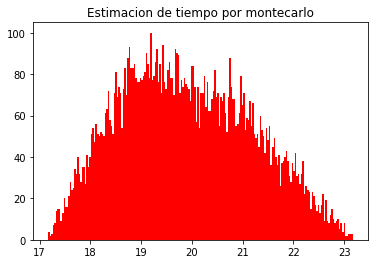

Tiempo estimado:19.892038318060354 +/- 2.582444418006425 s


In [26]:
#calculo el tiempo
MCt = np.sqrt(2*MCd/MCmu*g)
plt.hist(MCt,bins=200, color= 'red')
plt.title("Estimacion de tiempo por montecarlo")
plt.show()
#imprimo la incerteza del tiempo: para obtener el 95% de los valores voy a quedarme con 2*sigma
print("Tiempo estimado:{} +/- {} s".format(MCt.mean(),2*MCt.std()))

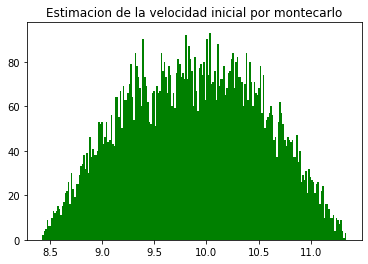

Velocidad inicial estimada:9.881301043280338 +/- 1.2800440937539737 m/s


In [27]:
#calculo la velocidad
MCv = np.sqrt(2*MCd*MCmu*g)
plt.hist(MCv,bins=200, color='green')
plt.title("Estimacion de la velocidad inicial por montecarlo")
plt.show()
#imprimo la incerteza de la velocidad inicial: para obtener el 95% de los valores voy a quedarme con 2*sigma
print("Velocidad inicial estimada:{} +/- {} m/s".format(MCv.mean(),2*MCv.std()))

Ahora sin montcarlo, a ver cuanto me aproximo.

err_t =  1/2 * (delta_d / d_0 + delta_mu / mu_0) * t

In [28]:
err_t = 1/2 * (1/d + 0.1/mu )* t0
print("Tiempo teorico: {} +/- {} m/s".format(t0,err_t))
err_v = 1/2 * (1/d + 0.1/mu )* v0
print("Velocidad teorica: {} +/- {} m/s".format(v0,err_v))

Tiempo teorico: 19.79898987322333 +/- 2.9698484809835 m/s
Velocidad teorica: 9.899494936611665 +/- 1.48492424049175 m/s


Punto 8: Peugeot vs IES
(basado en http://creandoconciencia.org.ar/enciclopedia/accidentologia/modelos-fisicos-matematicos/El-Metodo-MONTE-CARLO.pdf ) 

In [40]:
g = 9.8 #m/s**2

#deltas
delta_x = 3 #(+/- 1.5)
delta_mu_peugeot = 0.2 #(+/- 1)
delta_mu_ies = 0.2 #(+/- 1)
#distancia
MCx = nprnd.rand(10000) * delta_x - 1.50
#masa automoviles
MCm_peugeot = nprnd.rand(10000) * 60 + 1267
MCm_ies = nprnd.rand(10000) * 40 + 550
#rozamientos
MCmu_peugeot = nprnd.rand(10000) * delta_mu_peugeot + 0.7
MCmu_ies = nprnd.rand(10000) * delta_mu_ies + 0.7


In [44]:
#voy a desglozar los terminos internos de la raiz por que alto bardo
a = MCmu_ies * (13.6 + MCx)
b = np.sqrt(MCmu_peugeot * (14.3 - MCx))
c = MCm_ies * np.sqrt(MCmu_peugeot*(11.31 - MCx))
d = MCm_peugeot * ((11.31 - MCx)**2 + 4.93**2)**(1/4)
MCv_peugeot = 3.6 * np.sqrt(2*g*(a + (b + (c / d) )**2))

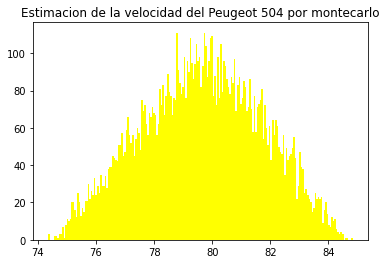

Velocidad del Peugeot estimada:79.65589165016321 +/- 4.130710229923806 m/s


In [45]:
plt.hist(MCv_peugeot,bins=200, color='yellow')
plt.title("Estimacion de la velocidad del Peugeot 504 por montecarlo")
plt.show()
print("Velocidad del Peugeot estimada:{} +/- {} m/s".format(MCv_peugeot.mean(),2*MCv_peugeot.std()))